# Número de operaciones por compañía aérea en los Aeropuertos de la red de AENA

#### <font color='crimson'>AUTOR: Alberto Romero Jiménez</font>

#### <font color='crimson'>FECHA: 16/12/2021</font>

En el siguiente documento, se van a analizar los datos del número de operaciones por compañía aérea del **año 2019**, en todos los aeropuertos españoles gestionados por AENA, así como el número de pasajeros y de kg de mercancías transportados durante ese mismo ese año, además de otras variables de interés.

Los datos han sido descargados a través de la web oficial de **<a href="https://www.aena.es/es/estadisticas/inicio.html">estadísticas de AENA</a>**



*Nota: se analiza el año 2019 ya que fue el último año "normal" antes de la pandemia*

In [435]:
import pandas as pd

df = pd.read_excel(r'../Python Scripts/datos_AENA.xlsx')

# Mostramos las 5 primeras filas del dataset
df.head()

,Aeropuerto Base,A CORUÑA,ADOLFO SUÁREZ MADRID-BARAJAS,AEROPUERTO INTL. REGIÓN MURCIA,ALBACETE,ALGECIRAS /HELIPUERTO,ALICANTE-ELCHE MIGUEL HDEZ.,ALMERIA,ASTURIAS,BADAJOZ,...,SEVE BALLESTEROS-SANTANDER,SEVILLA,SON BONET,TENERIFE NORTE-C. LA LAGUNA,TENERIFE SUR,VALENCIA,VALLADOLID,VIGO,VITORIA,ZARAGOZA
0,2 EXCEL AVIATION LTD,0,14,6,0,0,6,0,0,0,...,0,2,0,0,4,2,0,0,0,0
1,"4 PILOTS, S.L",0,0,0,0,0,0,0,0,0,...,0,0,40,0,0,0,0,0,0,0
2,A.ZAKARO FIRMA II,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,ABC BEDARFSFLUG GMBH,0,6,2,2,0,0,0,0,0,...,0,2,0,0,0,4,0,0,0,0
4,ABELAG AVIATION,0,36,4,2,0,8,0,4,2,...,0,8,0,0,0,18,0,0,0,16


In [77]:
df.shape

(1286, 50)

Observamos que el dataset contiene **1286 observaciones** (es decir, 1286 filas, representadas por las aerolíneas) y **50 atributos** (50 columnas, que representan los aeropuertos de España). En realidad contaremos **49 aeropuertos**, ya que la primera columna se descarta.

____

### Renombrar variables

Veamos los nombres de todos los Aeropuertos que conforman el conjunto de datos:

In [75]:
df.columns.values

array(['Aeropuerto Base', 'A CORUÑA', 'ADOLFO SUÁREZ MADRID-BARAJAS',
       'AEROPUERTO INTL. REGIÓN MURCIA', 'ALBACETE',
       'ALGECIRAS /HELIPUERTO', 'ALICANTE-ELCHE MIGUEL HDEZ.', 'ALMERIA',
       'ASTURIAS', 'BADAJOZ', 'BARCELONA-EL PRAT J.T.', 'BILBAO',
       'BURGOS', 'CEUTA /HELIPUERTO', 'CORDOBA', 'EL HIERRO',
       'FGL GRANADA-JAEN', 'FUERTEVENTURA', 'GIRONA-COSTA BRAVA',
       'GRAN CANARIA', 'HUESCA-PIRINEOS', 'IBIZA', 'JEREZ DE LA FRONTERA',
       'LA GOMERA', 'LA PALMA', 'LANZAROTE CÉSAR MANRIQUE', 'LEON',
       'LOGROÑO', 'MADRID-CUATRO VIENTOS', 'MALAGA-COSTA DEL SOL',
       'MELILLA', 'MENORCA', 'MURCIA-SAN JAVIER', 'PALMA DE MALLORCA',
       'PAMPLONA', 'REUS', 'SABADELL', 'SALAMANCA', 'SAN SEBASTIAN',
       'SANTIAGO-ROSALÍA DE CASTRO', 'SEVE BALLESTEROS-SANTANDER',
       'SEVILLA', 'SON BONET', 'TENERIFE NORTE-C. LA LAGUNA',
       'TENERIFE SUR', 'VALENCIA', 'VALLADOLID', 'VIGO', 'VITORIA',
       'ZARAGOZA'], dtype=object)

Para evitar que el dataframe quede tan largo, vamos a renombrar los 49 aeropuertos con sus respectivos códigos IATA, para que así quede la visualización más compacta:

In [436]:
df = df.rename({'Aeropuerto Base':'Aeropuerto Base', 'A CORUÑA':'LCG', 'ADOLFO SUÁREZ MADRID-BARAJAS':'MAD', 
               'AEROPUERTO INTL. REGIÓN MURCIA':'RMU', 'ALBACETE':'ABC', 'ALGECIRAS /HELIPUERTO':'AEI',
               'ALICANTE-ELCHE MIGUEL HDEZ.': 'ALC', 'ALMERIA':'LEI','ASTURIAS':'OVD', 'BADAJOZ':'BJZ',
               'BARCELONA-EL PRAT J.T.':'BCN', 'BILBAO': 'BIO', 'BURGOS':'RGS', 'CEUTA /HELIPUERTO':'JCU',
               'CORDOBA':'ODB', 'EL HIERRO':'VDE', 'FGL GRANADA-JAEN':'GRX', 'FUERTEVENTURA':'FUE',
               'GIRONA-COSTA BRAVA': 'GRO', 'GRAN CANARIA':'LPA', 'HUESCA-PIRINEOS':'HSK', 'IBIZA':'IBZ',
               'JEREZ DE LA FRONTERA':'XRY', 'LA GOMERA':'GMZ', 'LA PALMA':'SPC', 'LANZAROTE CÉSAR MANRIQUE':'ACE',
               'LEON':'LEN', 'LOGROÑO':'RJL', 'MADRID-CUATRO VIENTOS':'ECV', 'MALAGA-COSTA DEL SOL':'AGP', 'MELILLA':'MLN',
               'MENORCA':'MAH', 'MURCIA-SAN JAVIER':'MJV', 'PALMA DE MALLORCA':'PMI', 'PAMPLONA':'PNA', 'REUS':'REU',
               'SABADELL':'QSA', 'SALAMANCA':'SLM', 'SAN SEBASTIAN':'EAS', 'SANTIAGO-ROSALÍA DE CASTRO':'SCQ',
               'SEVE BALLESTEROS-SANTANDER':'SDR', 'SEVILLA':'SVQ', 'SON BONET':'SBO', 'TENERIFE NORTE-C. LA LAGUNA':'TFN',
               'TENERIFE SUR':'TFS', 'VALENCIA':'VLC', 'VALLADOLID':'VLL', 'VIGO':'VGO', 'VITORIA':'VIT', 'ZARAGOZA':'ZAZ'}, axis='columns')
df

,Aeropuerto Base,LCG,MAD,RMU,ABC,AEI,ALC,LEI,OVD,BJZ,...,SDR,SVQ,SBO,TFN,TFS,VLC,VLL,VGO,VIT,ZAZ
0,2 EXCEL AVIATION LTD,0,14,6,0,0,6,0,0,0,...,0,2,0,0,4,2,0,0,0,0
1,"4 PILOTS, S.L",0,0,0,0,0,0,0,0,0,...,0,0,40,0,0,0,0,0,0,0
2,A.ZAKARO FIRMA II,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,ABC BEDARFSFLUG GMBH,0,6,2,2,0,0,0,0,0,...,0,2,0,0,0,4,0,0,0,0
4,ABELAG AVIATION,0,36,4,2,0,8,0,4,2,...,0,8,0,0,0,18,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,ZENITH AVIATION LTD,2,36,0,0,0,8,4,0,0,...,4,6,0,0,0,2,4,0,0,0
1281,ZEPHYR AVIATION LTD.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1282,ZIMEX AVIATION Ltd,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,4,4
1283,ZOOM AIRLINES INC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Vemos que, visualmente, queda más compacto. Podríamos hacer lo mismo con las aerolíneas, ya que éstas tienen sus respectivos códigos IATA también, pero al ser tantas (1286), mejor lo dejamos para otro momento...

---

## Total de operaciones por aerolínea

A simple vista, vemos que hay muchos ceros en la tabla, y que los pocos números que se han llegado a vislumbrar son bastante pequeños. Lo primero que nos interesaría saber es **el total** de operaciones desglosado por Aeropuerto:

In [437]:
df["Total Aerolínea"] = df.iloc[:, -49:].sum(axis=1)
df

,Aeropuerto Base,LCG,MAD,RMU,ABC,AEI,ALC,LEI,OVD,BJZ,...,SVQ,SBO,TFN,TFS,VLC,VLL,VGO,VIT,ZAZ,Total Aerolínea
0,2 EXCEL AVIATION LTD,0,14,6,0,0,6,0,0,0,...,2,0,0,4,2,0,0,0,0,64
1,"4 PILOTS, S.L",0,0,0,0,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,42
2,A.ZAKARO FIRMA II,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,6
3,ABC BEDARFSFLUG GMBH,0,6,2,2,0,0,0,0,0,...,2,0,0,0,4,0,0,0,0,54
4,ABELAG AVIATION,0,36,4,2,0,8,0,4,2,...,8,0,0,0,18,0,0,0,16,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,ZENITH AVIATION LTD,2,36,0,0,0,8,4,0,0,...,6,0,0,0,2,4,0,0,0,286
1281,ZEPHYR AVIATION LTD.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1282,ZIMEX AVIATION Ltd,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,4,4,36
1283,ZOOM AIRLINES INC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

## Total de operaciones por aeropuerto

Ahora que tenemos el total de operaciones por aerolínea (filas), vamos a calcular el total por aeropuertos (columnas):

In [438]:
total_aeropuertos = df.sum().rename('Total Aeropuertos')
df.append(total_aeropuertos)

,Aeropuerto Base,LCG,MAD,RMU,ABC,AEI,ALC,LEI,OVD,BJZ,...,SVQ,SBO,TFN,TFS,VLC,VLL,VGO,VIT,ZAZ,Total Aerolínea
0,2 EXCEL AVIATION LTD,0,14,6,0,0,6,0,0,0,...,2,0,0,4,2,0,0,0,0,64
1,"4 PILOTS, S.L",0,0,0,0,0,0,0,0,0,...,0,40,0,0,0,0,0,0,0,42
2,A.ZAKARO FIRMA II,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,6
3,ABC BEDARFSFLUG GMBH,0,6,2,2,0,0,0,0,0,...,2,0,0,0,4,0,0,0,0,54
4,ABELAG AVIATION,0,36,4,2,0,8,0,4,2,...,8,0,0,0,18,0,0,0,16,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,ZEPHYR AVIATION LTD.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1282,ZIMEX AVIATION Ltd,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,4,4,36
1283,ZOOM AIRLINES INC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,"ZOREX, S. A.",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


Ya tenemos los totales desglosados por aerolínea y por aeropuerto. Vemos que el total definitivo es de **2.361.045 operaciones para el año 2019**.

---

## Top10 aeropuertos y Top10 aerolíneas con más operaciones

Como la tabla es bastante extensa, solo nos interesa saber aquellas aerolíneas con más volumen de operaciones:

In [439]:
# Ordenamos de mayor a menor el nº de operaciones totales por AEROLÍNEA
df.sort_values(['Total Aerolínea'], ascending=[False]).head(10)

,Aeropuerto Base,LCG,MAD,RMU,ABC,AEI,ALC,LEI,OVD,BJZ,...,SVQ,SBO,TFN,TFS,VLC,VLL,VGO,VIT,ZAZ,Total Aerolínea
1036,RYANAIR DAC,0,39999,3652,0,0,27520,616,2,0,...,17663,0,1422,14016,18932,894,222,956,1272,293991
1253,"VUELING AIRLINES, S.A.",4232,8920,0,0,0,12447,588,3326,0,...,13587,0,6479,791,7597,344,1032,4,408,282022
114,AIR EUROPA,2753,68448,8,0,0,3157,228,2860,12,...,2882,0,9876,404,6245,66,2922,28,424,165838
133,AIR NOSTRUM L.A. MEDITERRANEO,85,48053,32,0,0,3709,4276,262,1564,...,3603,0,406,2,11182,86,1183,138,66,136518
673,IBERIA,2819,93658,4,0,0,6,32,2932,0,...,20,0,0,2,32,4,2830,8,8,121161
302,BINTER CANARIAS,0,2,38,0,0,0,0,0,0,...,0,0,18801,2011,4,0,452,0,38,75845
450,EASYJET UK LTD,0,6545,1800,0,0,9744,616,4,0,...,1822,0,0,3704,2286,0,0,0,0,67046
674,IBERIA EXPRESS,28,38667,0,0,0,0,0,254,0,...,2190,0,4138,1277,8,0,66,0,0,63911
335,"CANARIAS AIRLINES, COMPAÑIA DE",0,0,0,0,0,0,0,0,0,...,0,0,20097,1199,0,0,0,0,0,55845
731,JET2.COM LIMITED,0,2,413,0,0,7361,724,0,0,...,2,0,0,6445,12,0,0,0,0,44477


Observamos que las aerolíneas con más de 100.000 operaciones en 2019 fueron:    
    
   * **RYANAIR** = 293.991 operaciones
   * **VUELING** = 282.022 operaciones
   * **AIR EUROPA** = 165.838 operaciones
   * **AIR NOSTRUM** = 136.518 operaciones
   * **IBERIA** = 121.161 operaciones
 
---

Ahora calcularemos el Top10 de aeropuertos con más operaciones:

In [440]:
# Primero quitamos las dos columnas que no nos sirven
aux = df.drop(['Aeropuerto Base', 'Total Aerolínea'], axis=1)

# Ordenamos de mayor a menor el nº de operaciones totales por AEROPUERTO
aux.sum().sort_values(ascending=False).head(10)

MAD    426375
BCN    344563
PMI    217222
AGP    144939
LPA    126451
ALC    101410
VLC     77702
TFN     75388
IBZ     75378
TFS     70277
dtype: int64

Observamos que los aeropuertos con más de 100.000 operaciones en 2019 fueron:

* **Madrid-Barajas** = 426.375 operaciones
* **Barcelona-El Prat** = 344.563 operaciones
* **Palma de Mallorca** = 217.222 operaciones
* **Málaga-Costa del Sol** = 144.939 operaciones
* **Las Palmas de Gran Canaria** = 126.451 operaciones
* **Alicante** = 101.410 operaciones

---

## Frecuencias

Ahora vamos a hilar más fino: se va a intentar averiguar en qué aeropuerto voló más veces una aerolínea; es decir, esta vez no nos interesa saber la cantidad total de operaciones, sino la **frecuencia** de las aerolíneas en cada aeropuerto (y viceversa).

Primero comenzamos con la aerolínea que tenga la frecuencia más elevada:

In [441]:
# Con esta expresión se podría averiguar la mayor frecuencia de cada aerolínea, pero se usará tan sólo como variable auxiliar
index = aux.max(axis=1)  # axis=1 -> eje vertical Y (aerolíneas)

In [442]:
# Con esta expresión, averiguamos el aeropuerto con más frecuencia por aerolínea
max(enumerate(index), key=(lambda x: x[1]))

(1253, 132831)

Observamos que nos devuelve un índice: **(1253, 132831)**.

Esto quiere decir que la aerolínea que está en la **posición nº 1253** en la tabla original, tiene una **frecuencia de 132.831 operaciones** en un aeropuerto en concreto. ¿Qué aerolínea es la que está en la posición 1253 del dataset? Lo averiguamos:

In [446]:
print(df.loc[[1253]])

             Aeropuerto Base   LCG   MAD  RMU  ABC  AEI    ALC  LEI   OVD  \
1253  VUELING AIRLINES, S.A.  4232  8920    0    0    0  12447  588  3326   

      BJZ  ...    SVQ  SBO   TFN  TFS   VLC  VLL   VGO  VIT  ZAZ  \
1253    0  ...  13587    0  6479  791  7597  344  1032    4  408   

      Total Aerolínea  
1253           282022  

[1 rows x 51 columns]


Observamos que se trata de la aerolínea **VUELING AIRLINES**.

---

Ahora veamos la otra cara de la moneda: ¿qué aeropuertos son los que tienen más frecuencia de operaciones?

In [392]:
# Ordenamos las frecuencias de cada aeropuerto en orden descendente (de mayor a menor frecuencia):
aux.max(axis=0).sort_values(ascending=False)  # axis=0 -> eje horizontal X (aeropuertos)

BCN    132831
MAD     93658
XRY     34543
PMI     33852
LPA     29164
AGP     29086
ALC     27520
TFN     20097
QSA     20043
VLC     18932
SVQ     17663
BIO     15743
TFS     14016
IBZ     11632
ECV      9068
ACE      8756
GRO      8492
SPC      7651
MAH      7541
SLM      7456
SCQ      7330
HSK      7226
FUE      7051
MLN      6874
JCU      6173
VIT      5356
SBO      5260
LCG      4452
GRX      4388
REU      4339
LEI      4276
SDR      4076
RMU      3652
EAS      3441
OVD      3326
AEI      3162
VGO      2922
PNA      2641
ODB      2532
VDE      2250
GMZ      1811
BJZ      1564
ZAZ      1272
RGS       974
VLL       904
LEN       734
RJL       476
ABC       118
MJV        86
dtype: int64

Con esto, podemos ver qué **el aeropuerto de Barcelona** fue el más frecuentado por las aerolíneas (la cifra de 132.831 operaciones coincide con la de VUELING AIRLINES), seguido de **Madrid-Barajas** y **Jerez de la Frontera**. Llama la atención este último, ya que no es de los aeropuertos más transitados.


Pero, ¿qué aerolíneas fueron las que transitaron estos aeropuertos? Podemos averiguarlo fácilmente:

In [451]:
# Primero, averiguamos el segundo aeropuerto con mayor frecuencia: Madrid-Barajas, con 93.658 operaciones
for i, j in enumerate(index):
    if j == 93658:
        print(i)

673


¿Y qué aerolínea se esconde en la **posición 673** de la tabla?

In [449]:
print(df.loc[[673]])

    Aeropuerto Base   LCG    MAD  RMU  ABC  AEI  ALC  LEI   OVD  BJZ  ...  \
673          IBERIA  2819  93658    4    0    0    6   32  2932    0  ...   

     SVQ  SBO  TFN  TFS  VLC  VLL   VGO  VIT  ZAZ  Total Aerolínea  
673   20    0    0    2   32    4  2830    8    8           121161  

[1 rows x 51 columns]


En efecto, se trata de **IBERIA**, cuya base de operaciones está en MAD.

Centrémonos ahora en el caso de Jerez de la Frontera:

In [452]:
# Averiguamos el tercer aeropuerto con mayor frecuencia: Jerez de la Frontera, con 34.543 operaciones
for i, j in enumerate(index):
    if j == 34543:
        print(i)

549


Y la aerolínea con la **posición 549** en la tabla es...

In [453]:
print(df.loc[[549]])

                Aeropuerto Base  LCG  MAD  RMU  ABC  AEI  ALC  LEI  OVD  BJZ  \
549  FLIGHT TRAINING EUROPE S.L    0    0    0    0    0    0   12    0  368   

     ...  SVQ  SBO  TFN  TFS  VLC  VLL  VGO  VIT  ZAZ  Total Aerolínea  
549  ...  824    0    0    0    0    0    0    0    0            37110  

[1 rows x 51 columns]


Se trata de la compañía **FLIGHT TRAINING EUROPE**, una escuela de aviación y entrenamiento situada en la ciudad gaditana.

---

# Gráficos

Importamos la librería `matplotlib` que nos permitirá generar todos los gráficos que veremos a continuación

In [188]:
from matplotlib import pyplot as plt

### Gráfico de Operaciones totales por aeropuerto

Primero cargamos otro documento en el que solo aparecen los aeropuertos (sin las aerolíneas):

In [257]:
# Leemos otro documento distinto, esta vez solo con las operaciones y los aeropuertos
df2 = pd.read_excel(r'../Python Scripts/aeropuertos.xlsx')

A continuación, vamos a ver un gráfico de barras del número de operaciones de todos los aeropuertos de la red durante 2019:

Text(0.5, 1.0, 'Operaciones Totales en cada aeropuerto de la red AENA')

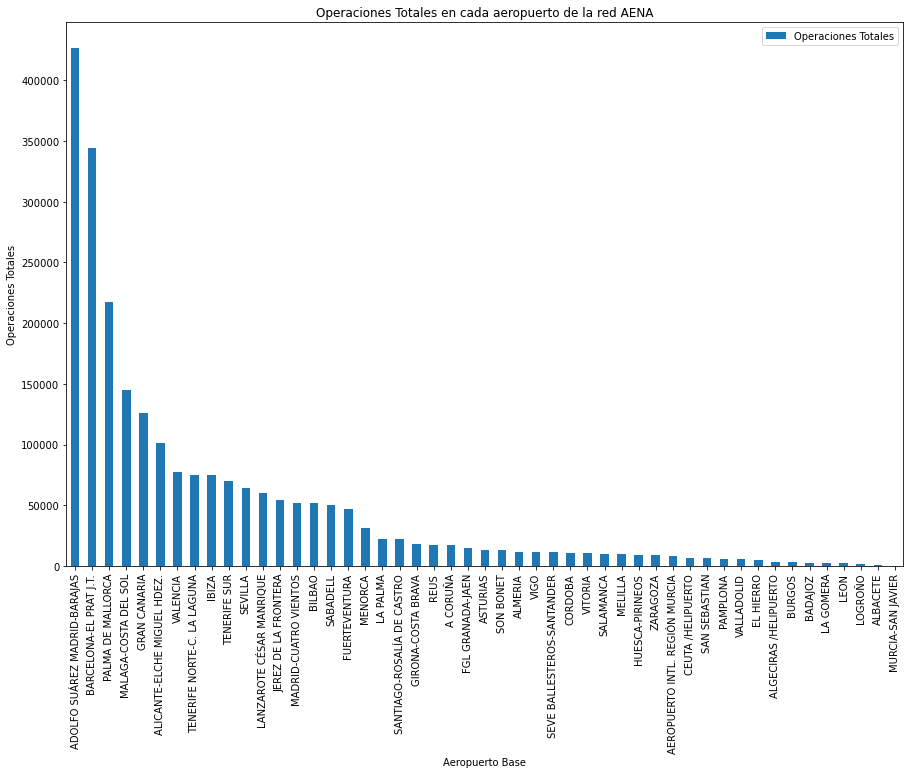

In [463]:
plt.rcParams["figure.figsize"] = (15,10)
df2.plot(kind="bar", x="Aeropuerto Base", y="Operaciones Totales")
plt.xlabel("Aeropuerto Base")
plt.ylabel("Operaciones Totales")
plt.title("Operaciones Totales en cada aeropuerto de la red AENA")

Hay que tener en cuenta que el Aeropuerto de Murcia-San Javier (MJV) dejó de operar el 15 de enero de 2019, por eso no tiene tráfico. En su lugar, comenzó la operativa el Aeropuerto Internacional de la Región de Murcia (RMU).

---

### Gráfico de frecuencias por aerolínea

Ahora vamos a dibujar el **diagrama de frecuencias** (el valor máximo de operaciones por aerolínea en cada aeropuerto):

Text(0.5, 1.0, 'Frecuencia máxima de operaciones de una aerolínea por aeropuerto')

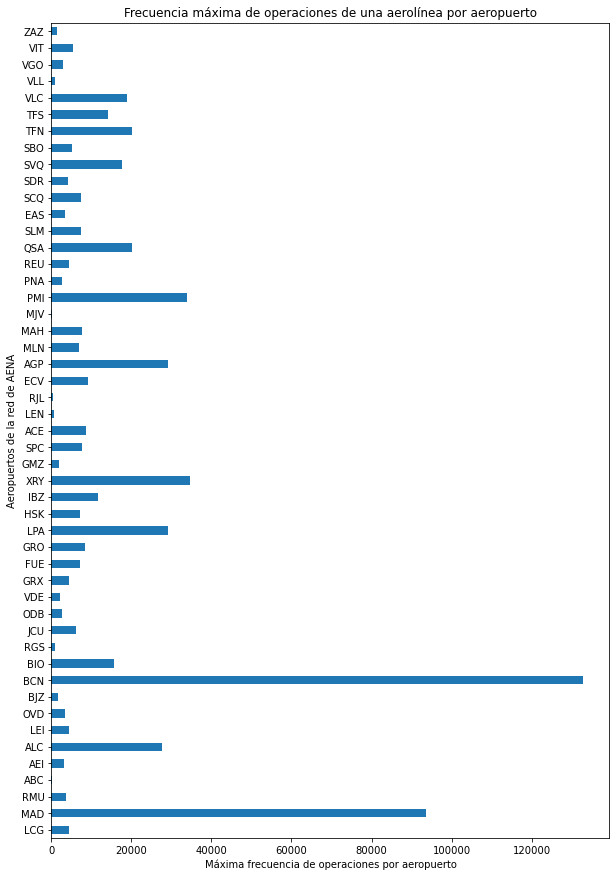

In [476]:
aux2 = aux.max(axis=0) 

# Podemos poner el diagrama horizontal, si así lo deseamos:
plt.rcParams["figure.figsize"] = (10,15)
aux2.plot(kind="barh")  # barh=diagrama horizontal
plt.xlabel("Máxima frecuencia de operaciones por aeropuerto")
plt.ylabel("Aeropuertos de la red de AENA")
plt.title("Frecuencia máxima de operaciones de una aerolínea por aeropuerto")


# Otra forma más "simple" de representarlo sería:

# aux2.plot(kind='barh', figsize=(10, 15), 
#          title="Frecuencia máxima de operaciones de una aerolínea por aeropuerto",
#          xlabel="Aeropuertos de la red de AENA",
#          ylabel="Aeropuertos de la red de AENA")

___

### Gráfico de operaciones por país

Cargamos otro documento en el que aparecen las operaciones totales por país:

In [470]:
df3 = pd.read_excel(r'../Python Scripts/Países.xlsx')
df3

,País,Operaciones Totales
0,ESPAÑA,1110709
1,REINO UNIDO,279904
2,ALEMANIA,193305
3,ITALIA,112570
4,FRANCIA,112170
...,...,...
169,SURINAME,1
170,TOGO,1
171,HAITI,0
172,LIBIA,0


De los 174 países, nos vamos a centrar en aquellos que tengan más operaciones. Vamos a calcular la media aritmética para saber el valor promedio:

In [539]:
import statistics
statistics.mean(df3["Operaciones Totales"])

13569.224137931034

Vemos que la media es de ~13500 operaciones, así pues, vamos a **filtrar** aquellos países que tengan más de 10.000 operaciones:

In [541]:
df3[df3.iloc[:,1]>10000]

,País,Operaciones Totales
0,ESPAÑA,1110709
1,REINO UNIDO,279904
2,ALEMANIA,193305
3,ITALIA,112570
4,FRANCIA,112170
5,HOLANDA,56322
6,PORTUGAL,53010
7,SUIZA,49025
8,BELGICA,47367
9,IRLANDA,28826


Observamos que son sólo **5 países** los que están por encima de las 100.000 operaciones: **Francia, Italia, Alemania, Reino Unido** y, naturalmente, **España** (ya que estamos analizando las operaciones gestionadas por AENA).

Vemos que la diferencia entre estos y el primer país fuera del "Top5" es casi de la mitad: en el sexto puesto se encuentra Holanda, con 56322 operaciones (justo el 50% de operaciones de Francia, con 112.170).

Se va a representar en un gráfico los países que forman parte del Top20 con más de 10.000 operaciones:

<ipython-input-579-d7b1be00a535>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',


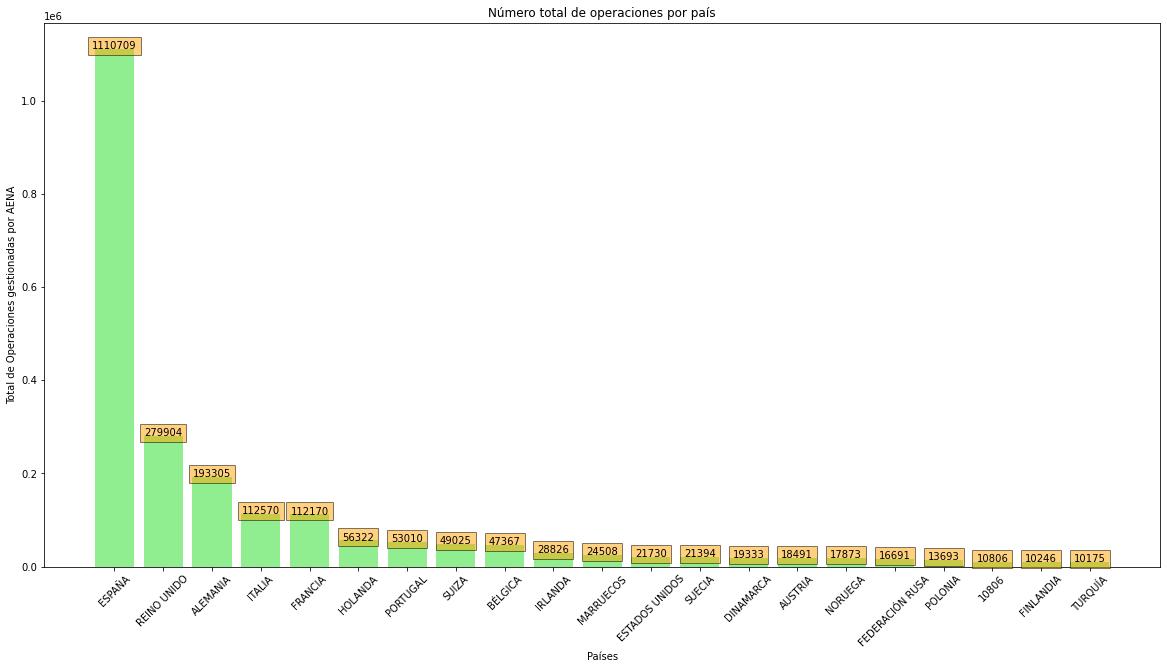

In [579]:
# Primero ponemos todos los países en una lista, almacenados en una variable "x"
x = ["ESPAÑA","REINO UNIDO","ALEMANIA","ITALIA","FRANCIA","HOLANDA","PORTUGAL","SUIZA","BÉLGICA","IRLANDA","MARRUECOS",
"ESTADOS UNIDOS","SUECIA","DINAMARCA","AUSTRIA","NORUEGA","FEDERACIÓN RUSA","POLONIA","10806","FINLANDIA","TURQUÍA"]

# Después ponemos el total de operaciones de cada país en otra lista, llamada "y"
y = [1110709,279904,193305,112570,112170,56322,53010,49025,47367,28826,
24508,21730,21394,19333,18491,17873,16691,13693,10806,10246,10175]

# Función para añadir el valor a las columnas
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'orange', alpha =.5))
   
        
# Tamaño del gráfico        
plt.figure(figsize = (20,10))

# Rotamos las variables en un ángulo de 45º para que se vean mejor
plt.xticks(rotation=45)

# Dibujamos el gráfico
plt.bar(x,y, color="lightgreen")
plt.xlabel("Países")
plt.ylabel("Total de Operaciones gestionadas por AENA")
plt.title("Número total de operaciones por país")

# Llamamos a la función "addlabels" para que muestre los valores en las columnas
addlabels(x, y)

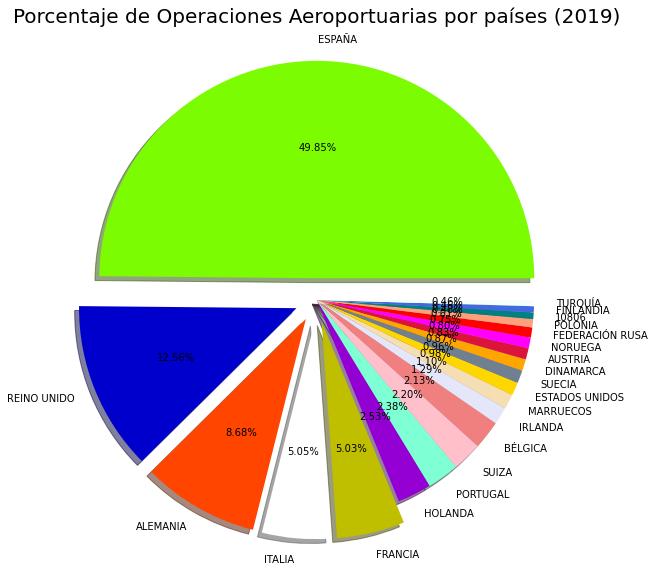

In [651]:
fig, ax = plt.subplots(figsize=(10, 10))

# Guardamos en una variable los valores para el argumento "explode" (resaltar los países con mayor %)
resaltar = [0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

# Guardamos en otra variable los colores para asignar a los 20 países
colores = ["lawngreen", "mediumblue", "orangered", "w","y","darkviolet","aquamarine","pink","lightcoral","lavender","wheat",
           "gold", "slategrey", "orange", "crimson", "magenta", "r", "lightsalmon", "teal", "royalblue", "mintcream"]

# Dibujamos la gráfica
plt.pie(y, labels=x, explode=resaltar, shadow=True, colors=colores, autopct='%.2f%%')  # autopct=porcentajes con 2 decimales
ax.set_title('Porcentaje de Operaciones Aeroportuarias por países (2019)', fontsize=20)
plt.show()

Se puede comprobar como casi la mitad de las operaciones (49.85%) tienen lugar en España, seguido de Reino Unido (12.56%), Alemania (8.68%), Italia (5.05%) y Francia (5.03%).

---

# Carga y Pasajeros por aerolíneas

Veamos el siguiente dataset, que contiene los datos relativos a las toneladas de carga y número de pasajeros desglosados por operador durante todo el año 2019:

In [731]:
df4 = pd.read_excel(r'../Python Scripts/PAX.xlsx')
df4

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Pasajeros,Transitos
0,RYANAIR DAC,0,531639,949,49922456,14047
1,"VUELING AIRLINES, S.A.",397714,1249342,0,42743967,3652
2,IBERIA,3519435,154088595,2379,20654378,1808
3,AIR EUROPA,4774364,83215500,5420,19036479,6022
4,EASYJET UK LTD,0,237,0,10767771,5486
...,...,...,...,...,...,...
1063,UPS UNITED PARCEL SERVICE,39259,34407734,0,0,0
1064,VOLGA DNEPR,0,31000,0,0,0
1065,WDL AVIATION,0,8500,0,0,0
1066,WEST ATLANTIC SWEDEN AB,0,1011130,339948,0,0


Observamos que tenemos 5 variables (6 contando la de `Compañía`):

   * **Kg Correo**: número de kilos de correspondencia transportados
   * **Mercancías Tránsito**: kg de mercancías en tránsito
   * **Mercancías**: kg de mercancías
   * **Pasajeros**: número de pasajeros transportados
   * **Tránsitos**: número de pasajeros en tránsito

---

   * ### Aerolínea que más correo transporta

Queremos averiguar qué aerolínea es la que lidera en cada variable. Primero vamos a empezar calculando los kg de correo:

In [732]:
df4[["Kg Correo"]].idxmax()

Kg Correo    1050
dtype: int64

Vemos que la aerolínea que más kg de correo transporta está en la posición (fila) 1050 del dataset. Averigüemos cuál es:

In [764]:
df4.iloc[1050]

Compañía               CYGNUS AIR, S.A.
Kg Correo                       6356150
Mercancías                     15503032
Mercancías Tránsito                   0
Pasajeros                             0
Transitos                             0
Name: 1050, dtype: object

Vemos que se trata de la compañía **CYGNUS AIR, S.A.**, con un total de 6.356.150 kgs de correo transportado.

---

   * ### Aerolínea que más mercancía transporta

Ahora vamos a averiguar la aerolínea que transporta más mercancía, tanto la "normal" como la que está en tránsito:

In [753]:
# Ahora averiguamos el índice (número de fila) de cada variable:
df4[['Mercancías', 'Mercancías Tránsito']].idxmax()

Mercancías               2
Mercancías Tránsito    993
dtype: int64

In [768]:
# Averiguamos la compañía en la fila número #2
df4.iloc[2]

Compañía                  IBERIA
Kg Correo                3519435
Mercancías             154088595
Mercancías Tránsito         2379
Pasajeros               20654378
Transitos                   1808
Name: 2, dtype: object

In [769]:
# Y ahora buscamos la compañía en la fila número #993
df4.iloc[993]

Compañía               EUROPEAN AIR TRANSPORT LEIPZIG
Kg Correo                                           0
Mercancías                                  100342927
Mercancías Tránsito                           8103384
Pasajeros                                           2
Transitos                                           0
Name: 993, dtype: object

Observamos que la compañía **IBERIA** es la que más kg de mercancías ha transportado (más de 154 millones de kg), y la compañía que más kg de mercancías en tránsito ha trasladado es **EUROPEAN AIR TRANSPORT LEIPZIG** (más de 8 millones de kg en tránsito).

---

   * ### Aerolínea que más pasajeros transporta

Por último, averiguaremos la aerolínea que más pasajeros traslada, tanto los de viaje punto-a-punto como los que están en tránsito:

In [771]:
df4[['Pasajeros', 'Transitos']].idxmax()

Pasajeros     0
Transitos    25
dtype: int64

In [772]:
# Averiguamos la compañía en la fila número #0
df4.iloc[0]

Compañía               RYANAIR DAC
Kg Correo                        0
Mercancías                  531639
Mercancías Tránsito            949
Pasajeros                 49922456
Transitos                    14047
Name: 0, dtype: object

In [773]:
# Averiguamos la compañía en la fila número #25
df4.iloc[25]

Compañía               TUI FLY (TUI AIRLINES BELGIUM)
Kg Correo                                         484
Mercancías                                      45927
Mercancías Tránsito                                68
Pasajeros                                     1673116
Transitos                                      105351
Name: 25, dtype: object

La compañía que más pasajeros trasladó durante el año 2019 fue **RYANAIR**, con un total de 49 millones de pasajeros.
La compañía que más tránsitos realizó fue la belga **TUI FLY**, con un total de 1.674.116 pasajeros en tránsito.

---

Ahora queremos completar la información del dataset añadiendo dos columnas adicionales:

   * **Mercancías Totales**: kg totales de todas las mercancías (`Mercancías + Mercancías Tránsito`)
   * **Pasajeros Totales**: número total de pasajeros transportados (`Pasajeros + Tránsitos`)

In [774]:
# Sumamos las dos columnas "Mercancías" y las "Mercancías Tránsito"
suma_mercancias = df4["Mercancías"] + df4["Mercancías Tránsito"]

# Creamos una nueva variable "Mercancías Totales" para añadir esta nueva columna al dataset
df4["Mercancías Totales"] = suma_mercancias
df4.head()

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Pasajeros,Transitos,Mercancías Totales
0,RYANAIR DAC,0,531639,949,49922456,14047,532588
1,"VUELING AIRLINES, S.A.",397714,1249342,0,42743967,3652,1249342
2,IBERIA,3519435,154088595,2379,20654378,1808,154090974
3,AIR EUROPA,4774364,83215500,5420,19036479,6022,83220920
4,EASYJET UK LTD,0,237,0,10767771,5486,237


In [776]:
# Ahora sumamos las dos columnas "Pasajeros" y "Transitos"
suma_pax = df4["Pasajeros"] + df4["Transitos"]

# Almacenamos estos valores en una nueva columna llamada "Pasajeros Totales"
df4["Pasajeros Totales"] = suma_pax
df4.head()

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Pasajeros,Transitos,Mercancías Totales,Pasajeros Totales
0,RYANAIR DAC,0,531639,949,49922456,14047,532588,49936503
1,"VUELING AIRLINES, S.A.",397714,1249342,0,42743967,3652,1249342,42747619
2,IBERIA,3519435,154088595,2379,20654378,1808,154090974,20656186
3,AIR EUROPA,4774364,83215500,5420,19036479,6022,83220920,19042501
4,EASYJET UK LTD,0,237,0,10767771,5486,237,10773257


Por último, queremos ordenar el dataset para mover de sitio las nuevas columnas. Queremos que `Mercancías Totales` quede a la derecha de `Mercancías Tránsito` y `Pasajeros Totales` quede a la derecha de `Transitos` (es decir, se puede quedar donde está).

In [778]:
# Simplemente escribimos las variables del dataset en el orden que queremos que aparezca y actualizamos "df4"
df4 = df4[["Compañía", "Kg Correo", "Mercancías", "Mercancías Tránsito", "Mercancías Totales", 
           "Pasajeros", "Transitos", "Pasajeros Totales"]]
df4.head()

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Mercancías Totales,Pasajeros,Transitos,Pasajeros Totales
0,RYANAIR DAC,0,531639,949,532588,49922456,14047,49936503
1,"VUELING AIRLINES, S.A.",397714,1249342,0,1249342,42743967,3652,42747619
2,IBERIA,3519435,154088595,2379,154090974,20654378,1808,20656186
3,AIR EUROPA,4774364,83215500,5420,83220920,19036479,6022,19042501
4,EASYJET UK LTD,0,237,0,237,10767771,5486,10773257


---

   * ### Gráficos de pasajeros y mercancías

Queremos representar gráficamente aquellas aerolíneas que hayan transportado **más de 5 millones de pasajeros** al año:

In [837]:
pax = df4[df4.iloc[:,7]>5000000]
pax

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Mercancías Totales,Pasajeros,Transitos,Pasajeros Totales
0,RYANAIR DAC,0,531639,949,532588,49922456,14047,49936503
1,"VUELING AIRLINES, S.A.",397714,1249342,0,1249342,42743967,3652,42747619
2,IBERIA,3519435,154088595,2379,154090974,20654378,1808,20656186
3,AIR EUROPA,4774364,83215500,5420,83220920,19036479,6022,19042501
4,EASYJET UK LTD,0,237,0,237,10767771,5486,10773257
5,IBERIA EXPRESS,2946928,4629074,1435,4630509,10299508,1859,10301367
6,AIR NOSTRUM L.A. MEDITERRANEO,33200,539703,950,540653,8936262,1981,8938243
7,JET2.COM LIMITED,17575,45769,0,45769,8034913,2928,8037841
8,NORWEGIAN AIR INTERNATIONAL,34282,952552,0,952552,6707958,2018,6709976
9,EUROWINGS GMBH,540,13674,0,13674,5618474,2628,5621102


<AxesSubplot:xlabel='Compañía'>

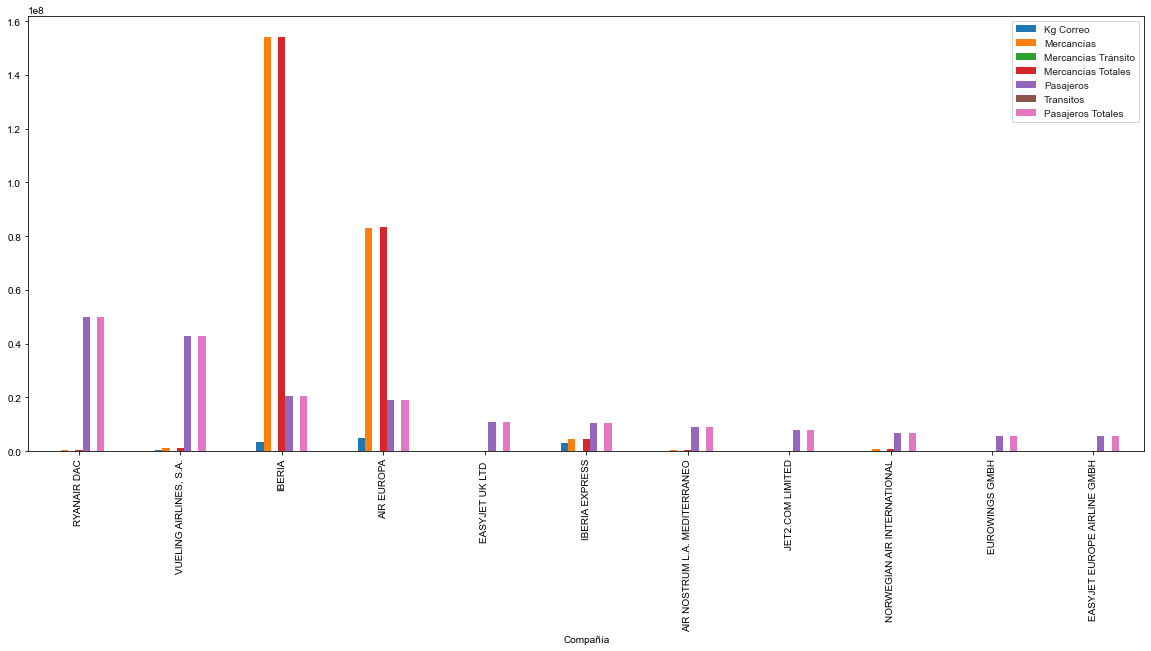

In [862]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20,8)
pax.plot.bar(x='Compañía', ax=ax)

---

Sumamos el total de cada variable para saber las cantidades totales:

In [865]:
prueba=df4.iloc[:,1:7].sum()
prueba

Kg Correo                31817017
Mercancías             1023951862
Mercancías Tránsito      16925994
Mercancías Totales     1040877856
Pasajeros               274731284
Transitos                  516103
dtype: int64

---
Para acabar, representaremos en dos diagramas de tarta el porcentaje de las aerolíneas:

   * Primero, el porcentaje (%) de aerolíneas que transportaron **más de 5 millones de pasajeros en 2019**.
   * Segundo, el porcentaje (%) de aerolíneas que transportaron **más de 50 millones de kg de mercancías en 2019**. 

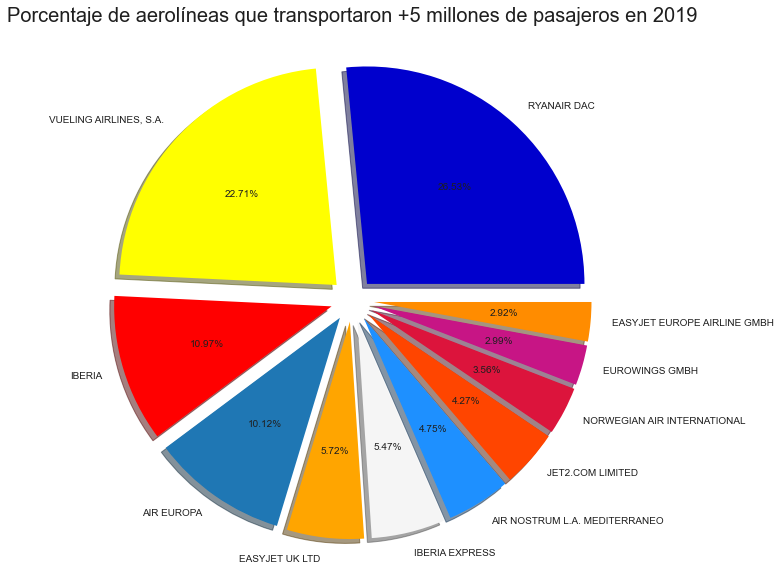

In [897]:
fig, ax = plt.subplots(figsize=(10, 10))

resaltar = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

colores = ["mediumblue","yellow","red","tab:blue","orange","whitesmoke",
           "dodgerblue","orangered","crimson","mediumvioletred","darkorange"]

ax.set_title('Porcentaje de aerolíneas que transportaron +5 millones de pasajeros en 2019', fontsize=20)
plt.pie(x=pax["Pasajeros Totales"], labels=pax["Compañía"], colors=colores, explode=resaltar, autopct='%.2f%%', shadow=True)

plt.show()

---

In [901]:
# Calculamos qué aerolíneas transportaron más de 50 millones de kg en mercancías totales
merc = df4[df4.iloc[:,4]>50000000]
merc

,Compañía,Kg Correo,Mercancías,Mercancías Tránsito,Mercancías Totales,Pasajeros,Transitos,Pasajeros Totales
2,IBERIA,3519435,154088595,2379,154090974,20654378,1808,20656186
3,AIR EUROPA,4774364,83215500,5420,83220920,19036479,6022,19042501
38,EMIRATES,1731052,68085659,424340,68509999,1038455,4450,1042905
39,QATAR AIRWAYS GROUP Q.C.S.C.,572763,104965529,0,104965529,905118,120,905238
993,EUROPEAN AIR TRANSPORT LEIPZIG,0,100342927,8103384,108446311,2,0,2


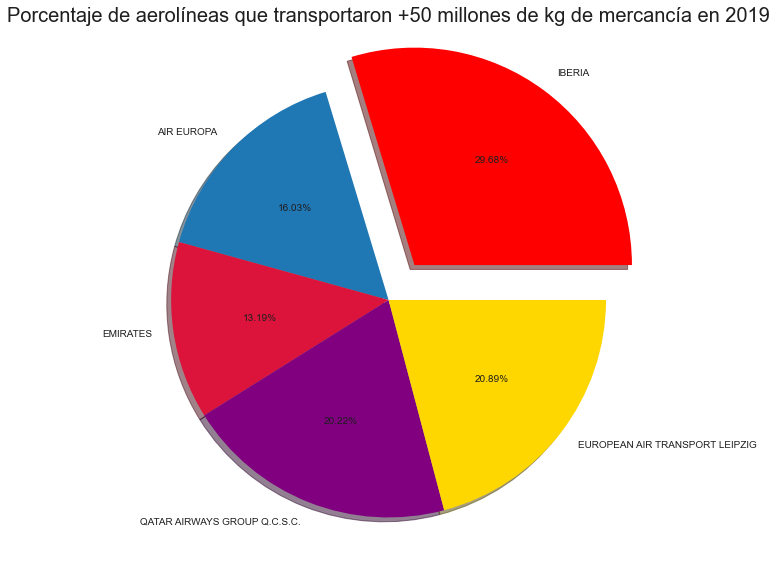

In [905]:
fig, ax = plt.subplots(figsize=(10, 10))

resaltar = [0.2,0,0,0,0]

colores = ["red","tab:blue","crimson","purple","gold"]

ax.set_title('Porcentaje de aerolíneas que transportaron +50 millones de kg de mercancía en 2019', fontsize=20)
plt.pie(x=merc["Mercancías Totales"], labels=merc["Compañía"], colors=colores, explode=resaltar, autopct='%.2f%%', shadow=True)

plt.show()